# Entscheidungsbaum beschränken

In [1]:
import pandas as pd

df = pd.read_csv("data/classification.csv")

# Wenn du ein paar Spalten vorab aus den Daten entfernen
# df = df.drop("Spaltenname", axis = 1)

# Wenn du eine kategorische Variable in mehrere Spalten umwandeln
# möchtest, kannst du das mit folgendem Code tun:
# df = pd.get_dummies(df, columns = ["Spaltenname"])

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [2]:
from sklearn.model_selection import train_test_split

# Welche Spalten sollen zur Vorhersage verwendet werden
X = df[["age", "interest"]].values

# Oder: Die Spalte "success" soll nicht zur Vorhersage verwendet werden:
# X = df.drop("success", axis = 1).values

y = df["success"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [3]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [4]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy", 
                               max_depth = 4, 
                               min_samples_leaf = 3)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9333333333333333


In [5]:
DecisionTreeClassifier?

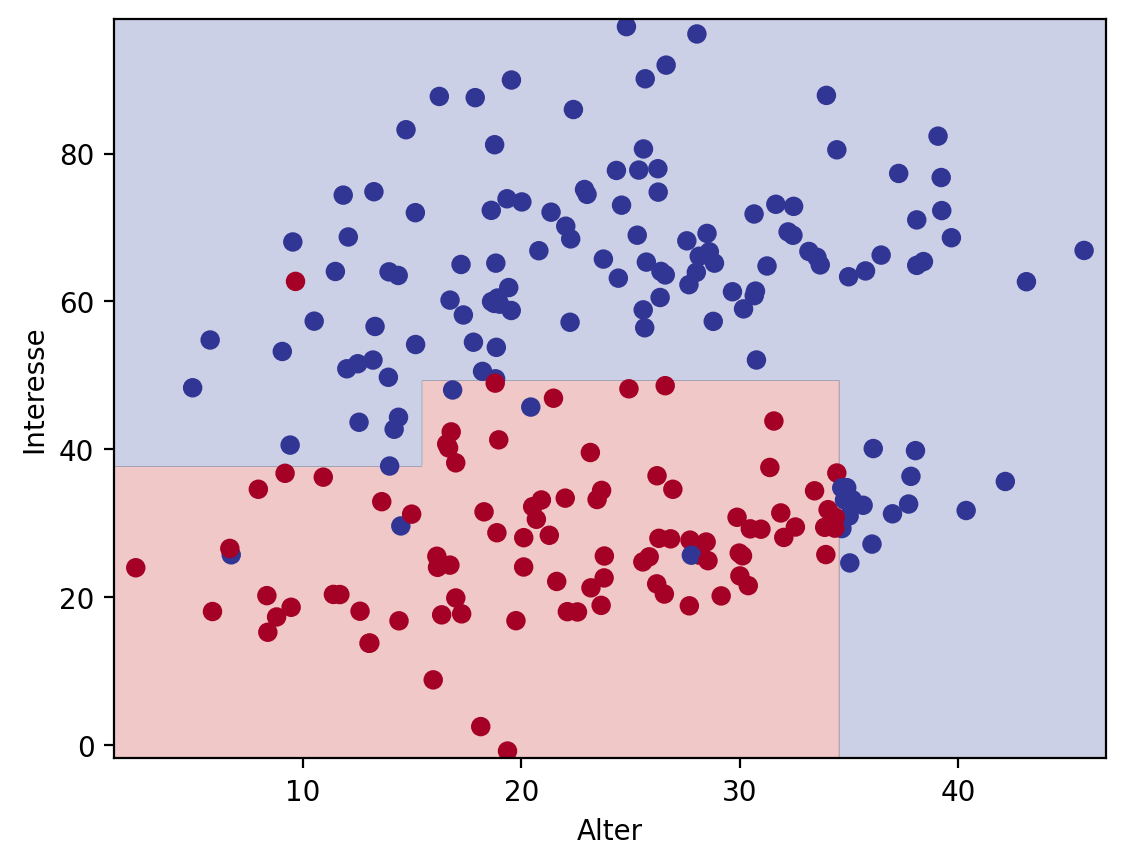

In [6]:
# Hinweis: Damit dieser Befehl funktioniert, muss die 
# "helper.py" - Datei im selben Ordner liegen, wie das
# aktuelle Jupyter Notebook

from helper import plot_classifier

# Trainings-Daten plotten
plot_classifier(model, X_train, y_train, proba = False, xlabel = "Alter", ylabel = "Interesse")

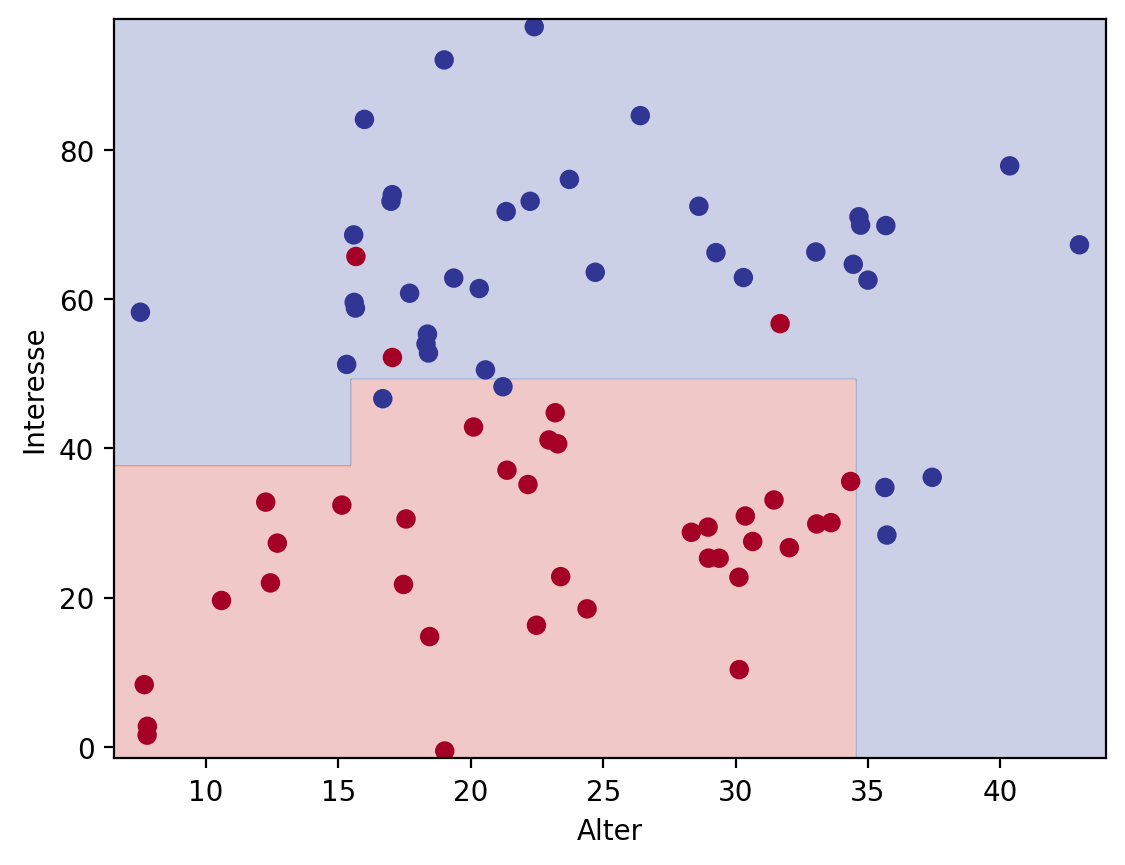

In [7]:
# Testdaten plotten
plot_classifier(model, X_test, y_test, proba = False, xlabel = "Alter", ylabel = "Interesse")

In [8]:
from sklearn.tree import export_graphviz

tree = export_graphviz(model, None, 
                       feature_names = ["age", "interest"], 
                       class_names = ["nicht gekauft", "gekauft"],
                       rounded = True,
                       filled = True)

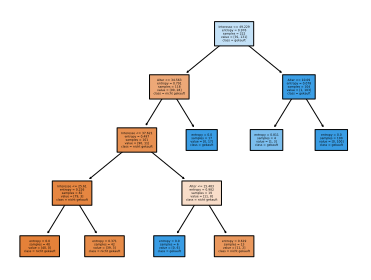

In [9]:
%matplotlib inline
%config InlineBackend.figure_formats = set(["svg"])
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#Variable fig für Dateiexport nötig
fig = plt.figure(dpi=800)
plot_tree(model, 
          fontsize=3, 
          feature_names = ["Alter", "Interesse"], 
          class_names = ["nicht gekauft", "gekauft"], 
          filled = True
         )
plt.show()

In [10]:
#Dateiexport
fig.savefig("./baum.jpg")
fig.savefig("./baum.png")
fig.savefig("./baum.svg")
fig.savefig("./baum.tiff")


In [11]:
model.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.92857143, 0.07142857],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.84615385, 0.15384615],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.92857143, 0.07142857],
       [1.        , 0.        ],
       [0.92857143, 0.07142857],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.92857143, 0.07142857],
       [0.        , 1.        ],
       [0.84615385, 0.15384615],
       [0.92857143, 0.07142857],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

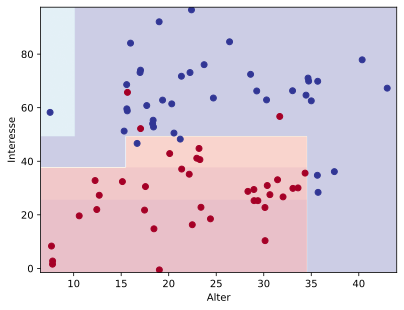

In [12]:
# Testdaten plotten
plot_classifier(model, X_test, y_test, proba = True, xlabel = "Alter", ylabel = "Interesse")